# Implementierung Algae Modell

## Bibs und packages 

In [2]:
from copy import deepcopy

In [3]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
mempyDEB.__file__

using local version


'c:\\users\\valen\\desktop\\projekte\\phytoplankton_deb_ibm\\mempydeb\\mempyDEB\\__init__.py'

## Tes Algae model alone 

In [4]:
p = deepcopy(defaultparams_DEBIBM)
p.glb['Q0'] = 0.1
p.glb['X0'] = 2
p.glb['P0'] = 2
p.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
sim_weber = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout_weber, aout_weber = sim_weber 
mout_weber

100%|██████████| 3/3 [00:01<00:00,  2.61it/s]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,0,0.0,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.967386,0,0.0,0,0,0,0,0.0
2,2,3.5,83.562629,0.573537,0.077831,0,0.0,0,0,0,0,0.0
3,3,7.0,163.332718,0.404153,0.005394,0,0.0,0,0,0,0,0.0
4,4,10.5,143.453752,0.361499,0.006921,0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,350.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,0.0
102,102,353.5,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,0.0
103,103,357.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,0.0
104,104,360.5,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,0.0


Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>


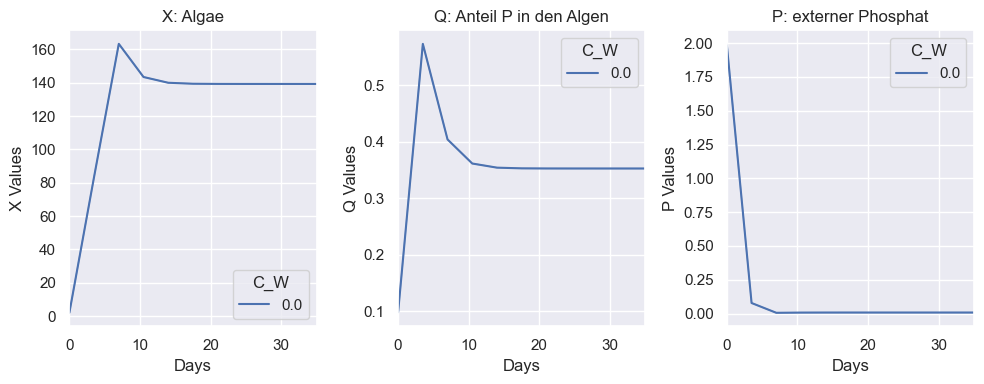

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_weber, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Aufgenommenes Phosphat in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].legend(title='C_W', loc='upper right')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_weber, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externes Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].legend(title='C_W', loc='upper right')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [6]:
p_c = deepcopy(defaultparams_DEBIBM)
p_c.glb['Q0'] = 0.1
p_c.glb['X0'] = 2
p_c.glb['P0'] = 2
p_c.glb['Pdot_in'] = p.glb['D'] * p.glb['R0']
p.glb['tspan'] = (0,30)
p_c.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24
C_W_vals = [0, 150, 300] 
sim_chem = exposure_DEBIBM(p_c, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


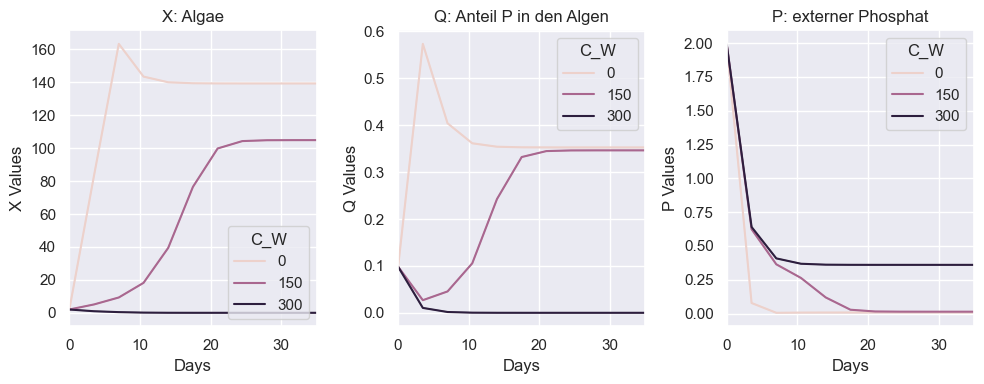

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Aufgenommenes Phosphat in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externes Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Algen und Daphnien Population

In [8]:
p_D = deepcopy(defaultparams_DEBIBM)
p_D.glb['tspan'] = (0,365)
p_D.glb['N_0'] = 10 #No Daphnia 
p_D.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D.glb['Pdot_in'] = 0.4
p_D.glb['tres'] = 240
p_D.glb['X0'] = 2
p_D.glb['Q0'] = .1
p_D.glb['P0'] = 2
p_D.glb['C_W'] = 0
sim_daphnia = simulate_DEBIBM(p_D) # runs the baseline model (a variant of DEBkiss)
mout_daphnia, aout = sim_daphnia 

100%|██████████| 3/3 [04:20<00:00, 86.85s/it]


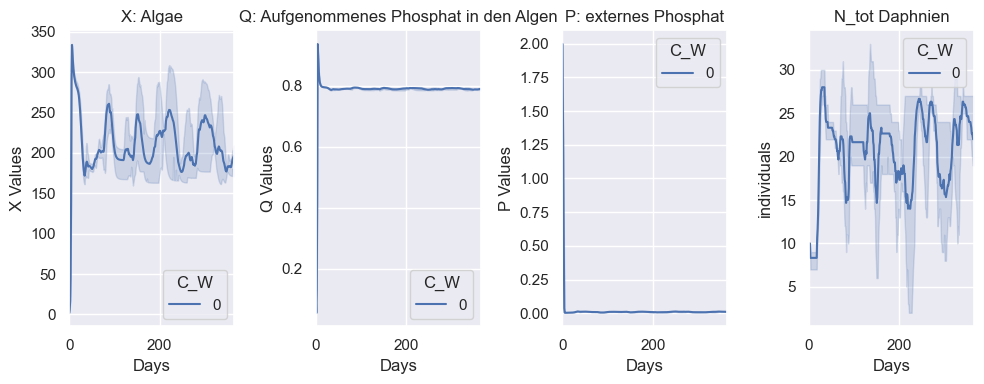

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data=mout_daphnia, x='t_day',y='N_tot', ax= ax[1], hue='C_W' )
ax[1].set_title('N_tot Daphnien')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('individuals')
ax[1].legend(title='C_W', loc='upper right')
ax[1].set_xlim(0,365)

plt.tight_layout()
plt.show()

In [10]:
p_D_C = deepcopy(defaultparams_DEBIBM)
C_Wvec = [0, 150, 300]
p_D_C.glb['tspan'] = (0,365)
p_D_C.glb['N_0'] = 10 #No Daphnia 
p_D_C.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D_C.glb['Pdot_in'] = 0.4
p_D_C.glb['tres'] = 240
p_D_C.glb['X0'] = 2
p_D_C.glb['Q0'] = .1
p_D_C.glb['P0'] = 2
p_D_C.glb['C_W'] = 0
sim_daphnia_chem = exposure_DEBIBM(p_D_C, C_Wvec) # runs the baseline model (a variant of DEBkiss)
mout_daphnia_chem, aout = sim_daphnia_chem 

100%|██████████| 3/3 [00:12<00:00,  4.12s/it]


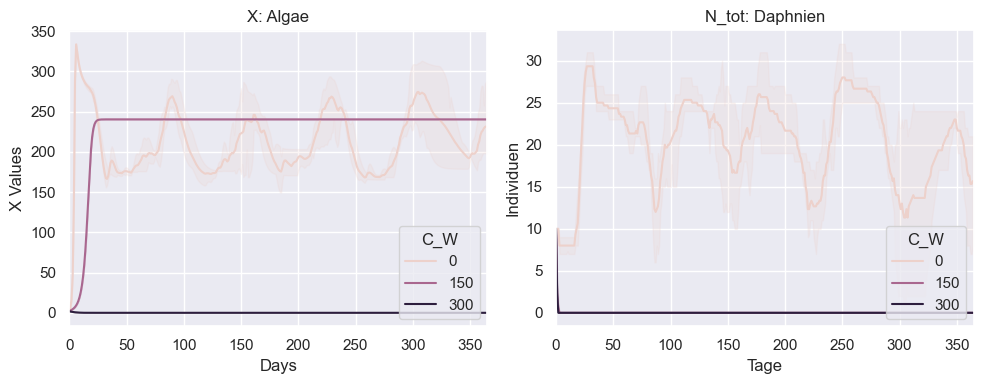

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia_chem, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data = mout_daphnia_chem, x='t_day', y='N_tot', ax =ax[1], hue ='C_W')
ax[1].set_title('N_tot: Daphnien')
ax[1].set_xlabel('Tage')
ax[1].set_ylabel('Individuen')
ax[1].legend(title='C_W', loc='lower right')
ax[1].set_xlim(0,365)
plt.tight_layout()
plt.show()

In [18]:
p_D_Cd = deepcopy(defaultparams_DEBIBM)
C_Wvec = [0, 0.1, 0.5]
p_D_Cd.glb['tspan'] = (0,365)
p_D_Cd.glb['N_0'] = 10 #No Daphnia 
p_D_Cd.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
p_D_Cd.glb['Pdot_in'] = 0.4
p_D_Cd.glb['tres'] = 240
p_D_Cd.glb['X0'] = 2
p_D_Cd.glb['Q0'] = .1
p_D_Cd.glb['P0'] = 2
p_D_Cd.glb['C_W'] = 0
sim_daphnia_chemd = exposure_DEBIBM(p_D_Cd, C_Wvec) # runs the baseline model (a variant of DEBkiss)
mout_daphnia_chemd, aout = sim_daphnia_chemd 

100%|██████████| 3/3 [00:12<00:00,  4.07s/it]


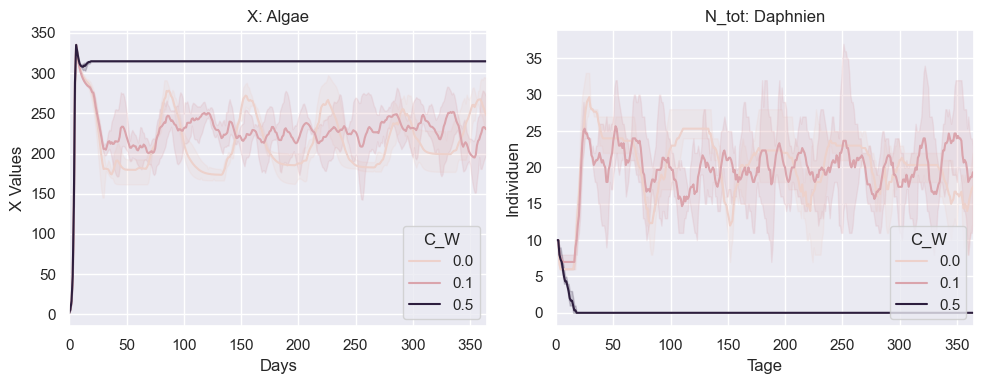

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

sns.lineplot(data=mout_daphnia_chemd, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].legend(title='C_W', loc='lower right')
ax[0].set_xlim(0,365)

sns.lineplot(data = mout_daphnia_chemd, x='t_day', y='N_tot', ax =ax[1], hue ='C_W')
ax[1].set_title('N_tot: Daphnien')
ax[1].set_xlabel('Tage')
ax[1].set_ylabel('Individuen')
ax[1].legend(title='C_W', loc='lower right')
ax[1].set_xlim(0,365)
plt.tight_layout()
plt.show()